In [139]:
%pip install mplcursors

     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     ------------------------------------ --- 81.9/88.8 kB 1.5 MB/s eta 0:00:01
     ---------------------------------------- 88.8/88.8 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20745 sha256=14db53e21a23908da0ad19cd96130dfe32e3c0b7c7bb46b4cddcd75c9e074117
  Stored in directory: c:\users\sangbeom\appdata\local\pip\cache\wheels\10\b6\58\05d5160d055ea77855fc

In [256]:
# 한글 폰트
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

In [14]:
# 각 csv파일에 season열 추가하기
for i in range(2013,2023):
  df = pd.read_csv(f'시즌별 팀별 데이터/{i}-{i+1} 팀별_ 데이터.csv')
  df['season'] = f'{i}-{i+1}'
  df.to_csv(f'시즌별 팀별 데이터/{i}-{i+1} 팀별 데이터.csv')

<Axes: xlabel='Score', ylabel='Rank'>

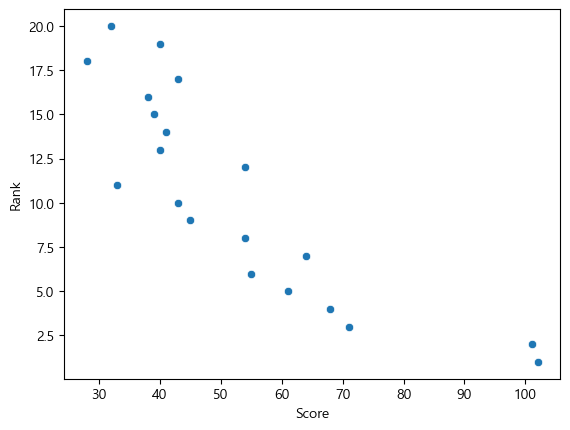

In [15]:
# 2013-2014 시즌 득점과 순위 비교
df = pd.read_csv('시즌별 팀별 데이터/2013-2014 팀별 데이터.csv')
df_sorted = df.sort_values('Score')
df_sorted
sns.scatterplot(x=df_sorted['Score'], y=df_sorted['Rank'])

In [3]:

# 빈 데이터프레임 생성
result_df = pd.DataFrame()

# 각 파일을 읽어서 데이터프레임을 리스트에 추가
for i in range(2013, 2023):
    df = pd.read_csv(f'시즌별 팀별 데이터/{i}-{i+1} 팀별 데이터.csv')
    result_df = pd.concat([result_df, df], ignore_index=True)
# 결과를 새로운 CSV 파일로 저장
result_df.to_csv('10시즌 간 팀별 총 데이터.csv', index=False)


In [148]:
soccer = pd.read_csv('combined file_1.csv')
print(soccer)

                        Team  Rank  Point  Score  Lose_score  Balance(m)  \
0                 Arsenal FC     4     79     68          41      -37.10   
1                Aston Villa    15     38     39          61      -11.74   
2               Cardiff City    20     30     32          74      -42.08   
3                 Chelsea FC     3     82     71          27      -52.42   
4             Crystal Palace    11     45     33          48      -33.00   
..                       ...   ...    ...    ...         ...         ...   
195        Nottingham Forest    16     38     38          68     -190.25   
196           Southampton FC    20     25     36          73     -146.61   
197        Tottenham Hotspur     8     60     70          63     -139.15   
198          West Ham United    14     40     42          55     -164.95   
199  Wolverhampton Wanderers    13     41     31          58     -114.24   

     AverageAge     season  
0          26.5  2013-2014  
1          24.4  2013-2014  


In [214]:
# 팀명 한글화
team_eng = ['Arsenal FC', 'Aston Villa', 'Cardiff City', 'Chelsea FC',
       'Crystal Palace', 'Everton FC', 'Fulham FC', 'Hull City',
       'Liverpool FC', 'Manchester City', 'Manchester United',
       'Newcastle United', 'Norwich City', 'Southampton FC', 'Stoke City',
       'Sunderland AFC', 'Swansea City', 'Tottenham Hotspur',
       'West Bromwich Albion', 'West Ham United', 'Burnley FC',
       'Leicester City', 'Queens Park Rangers', 'AFC Bournemouth',
       'Watford FC', 'Middlesbrough FC', 'Brighton & Hove Albion',
       'Huddersfield Town', 'Wolverhampton Wanderers', 'Sheffield United',
       'Leeds United', 'Brentford FC', 'Nottingham Forest']
team_kor = ['아스날','아스톤 빌라','카디프','첼시','크리스탈 팰리스','에버튼','풀럼','헐시티',
            '리버풀','맨시티','맨유','뉴캐슬','노리치','사우스햄튼','스토크시티','선더랜드',
            '스완지','토트넘','웨스트 브로미치','웨스트햄','번리','레스터시티','QPR','본머스',
            '왓포드','미들스브러','브라이튼','허더스필드','울버햄튼','셰필드','리즈','브렌트포드','노팅엄']


for eng in team_eng:
  ab = soccer.loc[soccer.Team == eng].index
  idx = []
  for i in ab:
    idx.append(i)
  soccer.iloc[idx,0] = team_kor[team_eng.index(eng)]
  
soccer['Balance(m)'] = soccer['Balance(m)'].map(lambda x:x*-1)
soccer.to_csv('Fianl_data.csv', encoding='euc\kr')
soccer.head()

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
0,아스날,4,79,68,41,37.10,26.5,2013-2014
1,아스톤 빌라,15,38,39,61,11.74,24.4,2013-2014
2,카디프,20,30,32,74,42.08,25.2,2013-2014
3,첼시,3,82,71,27,52.42,27.3,2013-2014
4,크리스탈 팰리스,11,45,33,48,33.00,27.7,2013-2014


In [237]:
soccer_copy = soccer.copy()

In [223]:
# 데이터 정규화하기
from sklearn.preprocessing import StandardScaler

# 'Team'와 'Season' 열을 제외한 열 선택
columns_to_normalize = soccer.columns.difference(['Team', 'season'])

# 'Team'와 'Season' 열을 따로 저장
teams = soccer['Team']
season = soccer['season']

# 정규화할 데이터 선택
data_to_normalize = soccer[columns_to_normalize]

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 정규화
normalized_data = scaler.fit_transform(data_to_normalize)

# 정규화된 데이터로 DataFrame 생성
soccer_nor = pd.DataFrame(normalized_data, columns=columns_to_normalize)
# 'Team'와 'Season' 열을 새로운 DataFrame에 추가
soccer_nor['Team'] = [f"{i}" for i in teams]
soccer_nor['season'] = [f"{i}" for i in season]
soccer_nor.to_csv("Final_Data_normalize.csv", encoding='euc\kr',index=False)
# 결과 확인
soccer_nor.head()

,AverageAge,Balance(m),Lose_score,Point,Rank,Score,Team,season
0,-0.105135,-0.166786,-0.859304,1.471927,-1.127243,0.897532,아스날,2013-2014
1,-2.149435,-0.565129,0.688992,-0.813155,0.780399,-0.739476,아스톤 빌라,2013-2014
2,-1.370654,-0.088562,1.695384,-1.259025,1.647509,-1.134616,카디프,2013-2014
3,0.673645,0.073854,-1.943111,1.639129,-1.300665,1.066878,첼시,2013-2014
4,1.063036,-0.231187,-0.317401,-0.423019,0.086711,-1.078167,크리스탈 팰리스,2013-2014


In [230]:
soccer_nm = pd.read_csv('Final_Data_normalize.csv', encoding='euc\kr')
# 맨유의 열시즌 데이터
mred_nor = soccer_nm.loc[soccer_nm.Team == '맨유']
mred_nor = mred_nor.sort_values('season')
mred = soccer.loc[soccer.Team == '맨유']
mred = mred.sort_values('season')
mred

,Team,Rank,Point,Score,Lose_score,Balance(m),AverageAge,season
10,맨유,7,64,64,43,75.33,26.5,2013-2014
30,맨유,4,70,62,37,148.65,25.7,2014-2015
49,맨유,5,66,49,35,55.33,25.4,2015-2016
70,맨유,6,69,54,29,137.75,26.4,2016-2017
91,맨유,2,81,68,28,152.90,26.3,2017-2018
113,맨유,6,66,65,54,52.15,26.0,2018-2019
131,맨유,3,66,66,36,155.62,24.7,2019-2020
152,맨유,2,74,73,44,64.30,25.5,2020-2021
172,맨유,6,58,57,57,110.90,27.0,2021-2022
193,맨유,3,75,58,43,219.63,26.6,2022-2023


In [260]:
mred_nor

,AverageAge,Balance(m),Lose_score,Point,Rank,Score,Team,season
10,-0.105135,0.433714,-0.704474,0.635922,-0.606977,0.671738,맨유,2013-2014
30,-0.883916,1.585391,-1.168963,0.970324,-1.127243,0.558841,맨유,2014-2015
49,-1.175959,0.119563,-1.323793,0.747389,-0.953821,-0.174990,맨유,2015-2016
70,-0.202483,1.414179,-1.788281,0.914590,-0.780399,0.107252,맨유,2016-2017
91,-0.299831,1.652148,-1.865696,1.583395,-1.474087,0.897532,맨유,2017-2018
113,-0.591873,0.069613,0.147088,0.747389,-0.780399,0.728186,맨유,2018-2019
131,-1.857392,1.694873,-1.246378,0.747389,-1.300665,0.784635,맨유,2019-2020
152,-1.078611,0.260459,-0.627060,1.193259,-1.474087,1.179775,맨유,2020-2021
172,0.381603,0.992431,0.379332,0.301519,-0.780399,0.276598,맨유,2021-2022
193,-0.007788,2.700313,-0.704474,1.248993,-1.300665,0.333046,맨유,2022-2023


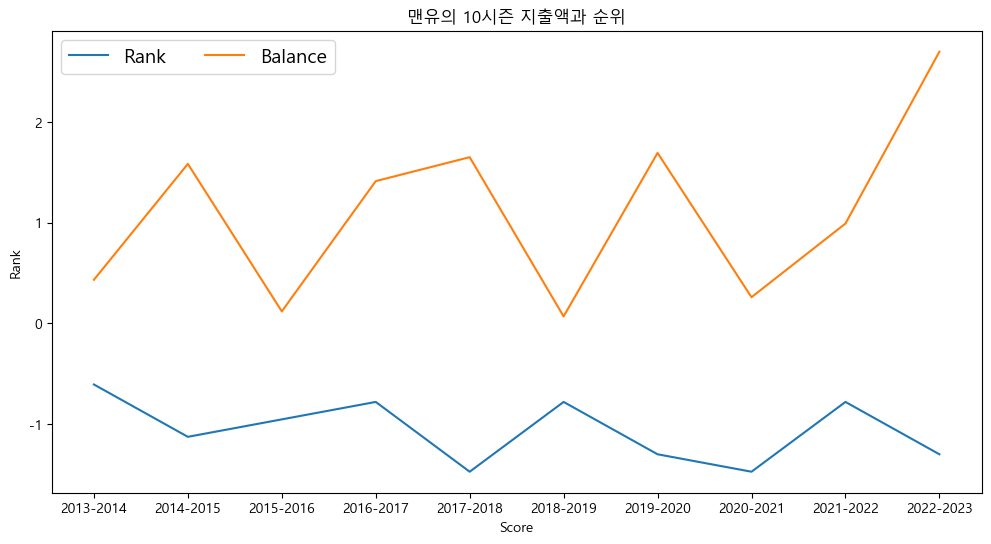

In [233]:
# 맨유의 10시즌 득점과 순위
plt.figure(figsize = (12,6))
sns.lineplot(data = mred_nor, x = 'season', y = 'Rank', label = 'Rank')
sns.lineplot(data = mred_nor, x = 'season', y = 'Balance(m)', label = 'Balance')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.xlabel('Score',loc='center')
plt.ylabel('Rank', loc = 'center')
plt.title('맨유의 10시즌 지출액과 순위',loc='center')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.show()

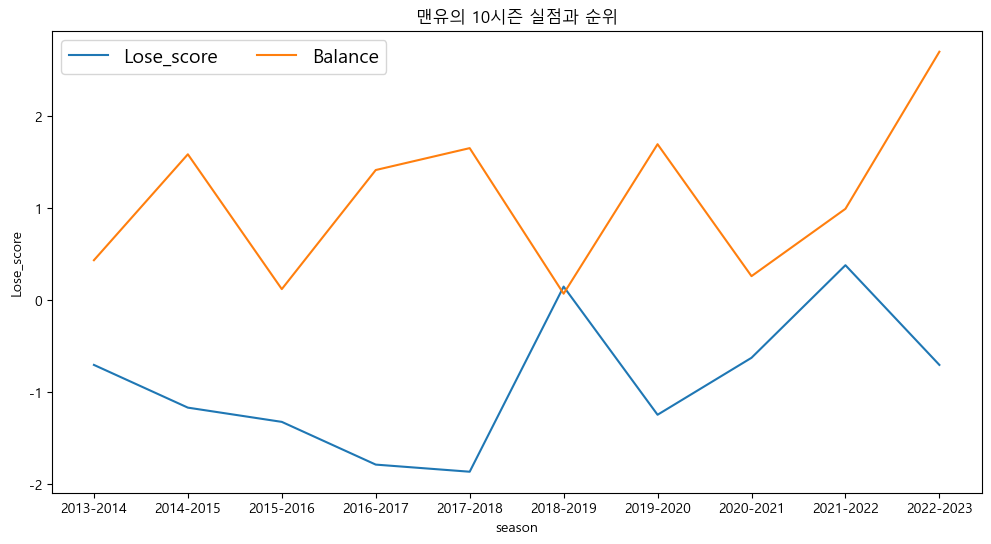

In [259]:
# 맨유의 10시즌 실점과 순위
plt.figure(figsize = (12,6))
sns.lineplot(data = mred_nor, x = 'season', y = 'Lose_score', label = 'Lose_score')
sns.lineplot(data = mred_nor, x = 'season', y = 'Balance(m)', label = 'Balance')
plt.xlabel('season',loc='center')
plt.ylabel('Lose_score', loc = 'center')
plt.title('맨유의 10시즌 실점과 순위',loc='center')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.show()

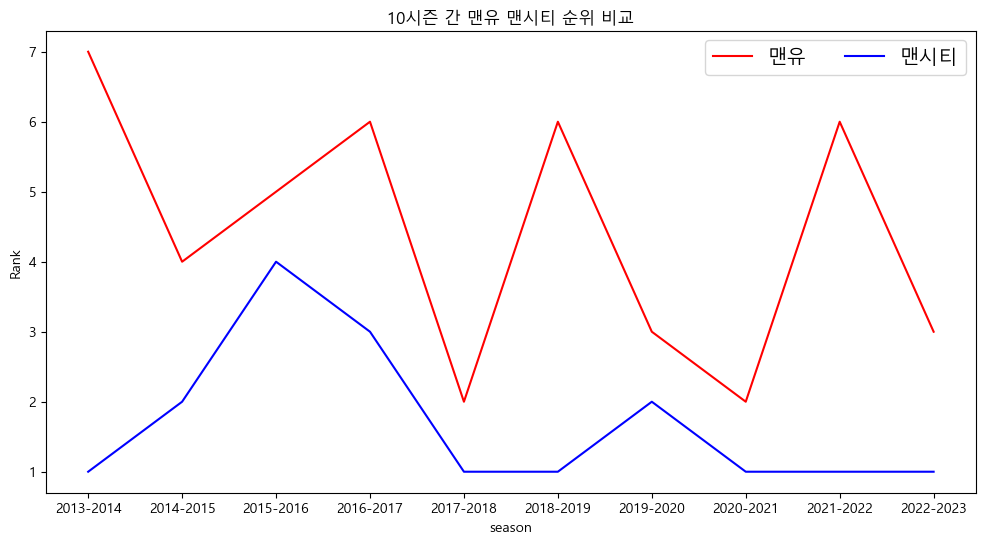

In [292]:
# 10시즌 간 시즌별 맨유와 맨시티 순위 비교
mblue_nor= soccer_nm.loc[soccer_nm.Team == '맨시티']
mblue_nor = mblue_nor.sort_values('season')
mblue = soccer.loc[soccer.Team == '맨시티']
mblue = mblue.sort_values('season')
plt.figure(figsize = (12,6))
sns.lineplot(data = mred, x = 'season', y = 'Rank', label = '맨유', color='red' )
sns.lineplot(data = mblue, x = 'season', y = 'Rank', label = '맨시티', color='blue')
plt.legend(loc = 'best', ncol =2, fontsize=14,frameon=True)
plt.title('10시즌 간 맨유 맨시티 순위 비교')
plt.show()

<Axes: title={'center': '2013-2014 시즌 순위와 실점'}, xlabel='Rank', ylabel='Lose_score'>

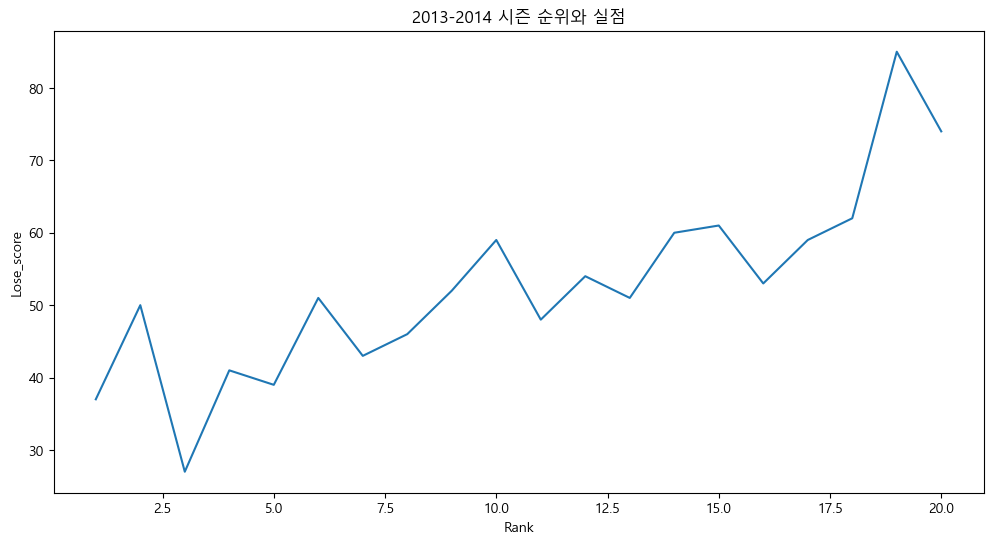

In [247]:
# 2013-2014 시즌 순위와 실점
ss_13_14 = soccer.loc[soccer_nm.season == '2013-2014']
ss_13_14 = ss_13_14.sort_values('Rank')
plt.figure(figsize = (12,6))
plt.title('2013-2014 시즌 순위와 실점')
sns.lineplot(data = ss_13_14, x = 'Rank',y = 'Lose_score')

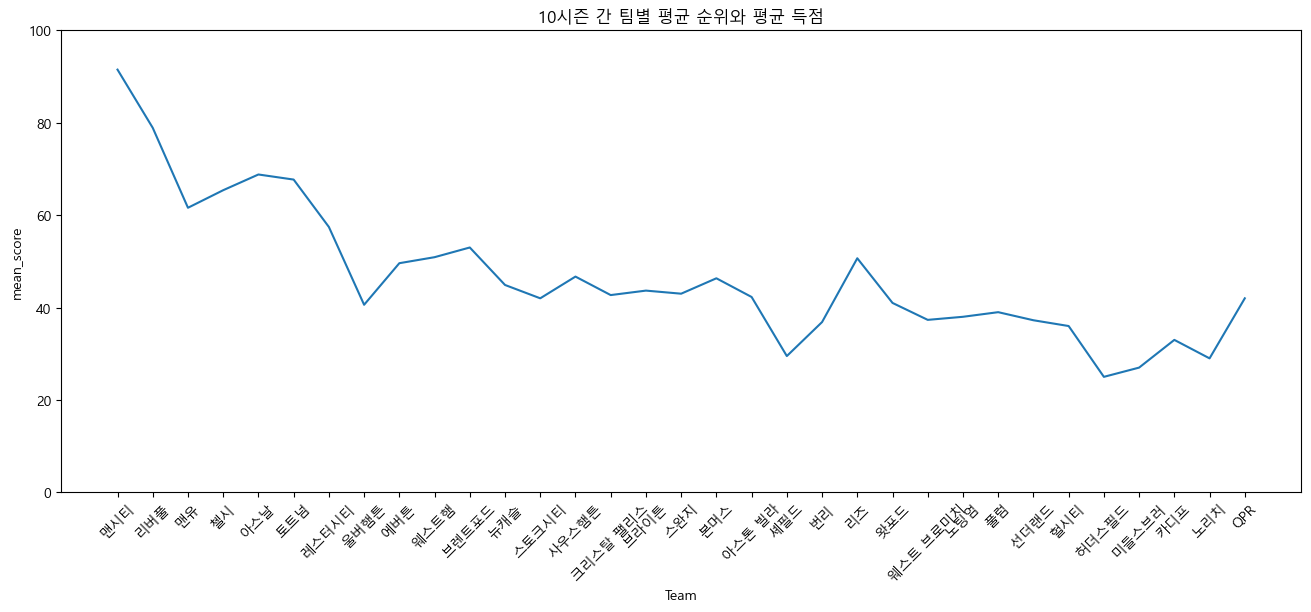

In [250]:
# 10시즌간 팀별 평균 순위와 평균 득점
team_score_rank= soccer_copy.groupby('Team').agg(mean_score = ('Score', 'mean'),    # 'Team'으로 묶어서 평균 득점과 평균 순위 변수 만들기
                                                 mean_rank = ('Rank', 'mean'))
team_score_rank = team_score_rank.sort_values('mean_rank', ascending=True)          # 순위 순으로 순서 정리
team_score_rank
plt.figure(figsize = (16,6))
sns.lineplot(data = team_score_rank, x = 'Team', y = 'mean_score')
plt.ylim(0,100)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 득점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


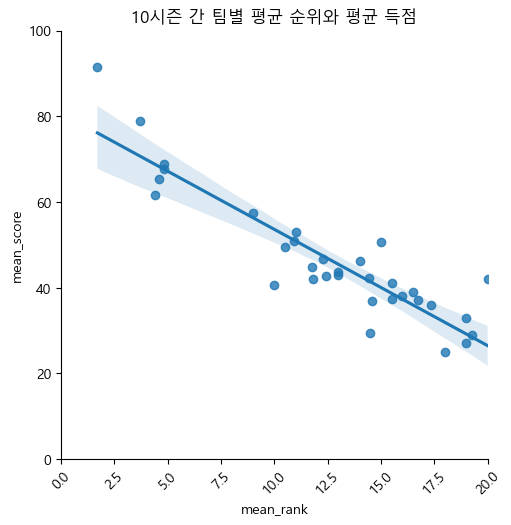

In [255]:
sns.lmplot(data = team_score_rank, x = 'mean_rank', y = 'mean_score')
plt.xlim(0,20)
plt.ylim(0,100)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 득점')
plt.show()

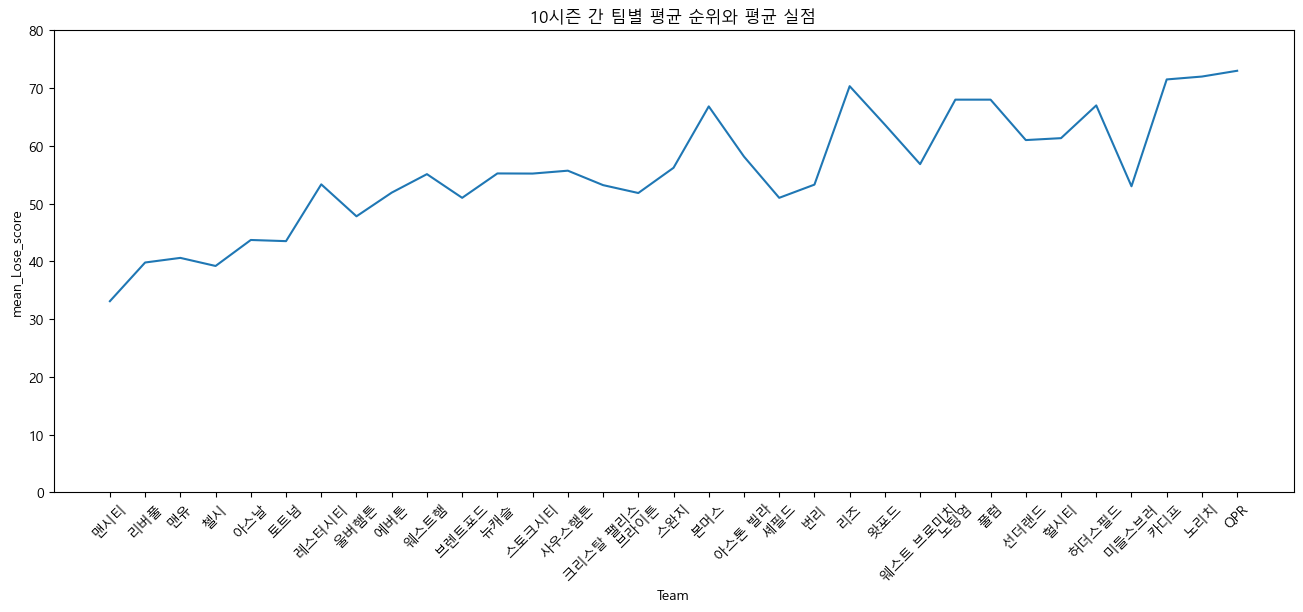

In [240]:
# 10시즌간 팀별 평균 순위와 평균 실점
team_Lose_score_rank= soccer_copy.groupby('Team').agg(mean_Lose_score = ('Lose_score', 'mean'),
                                                 mean_rank = ('Rank', 'mean'))
team_Lose_score_rank = team_Lose_score_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_Lose_score_rank, x = 'Team', y = 'mean_Lose_score')
plt.ylim(0,80)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 실점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

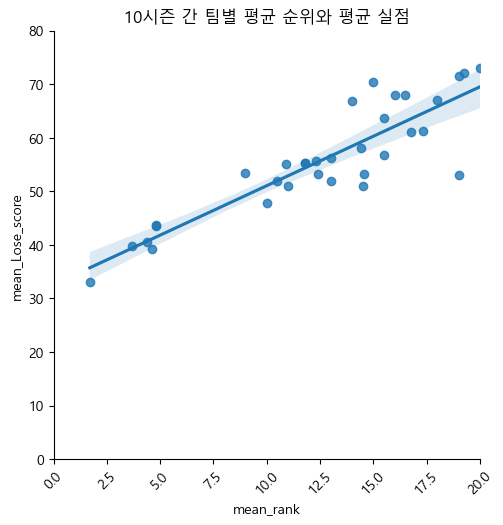

In [253]:
plt.figure(figsize = (16,6))
sns.lmplot(data = team_Lose_score_rank, x = 'mean_rank', y = 'mean_Lose_score')
plt.xlim(0,20)
plt.ylim(0,80)
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 실점')
plt.show()

25.4
28.066666666666666


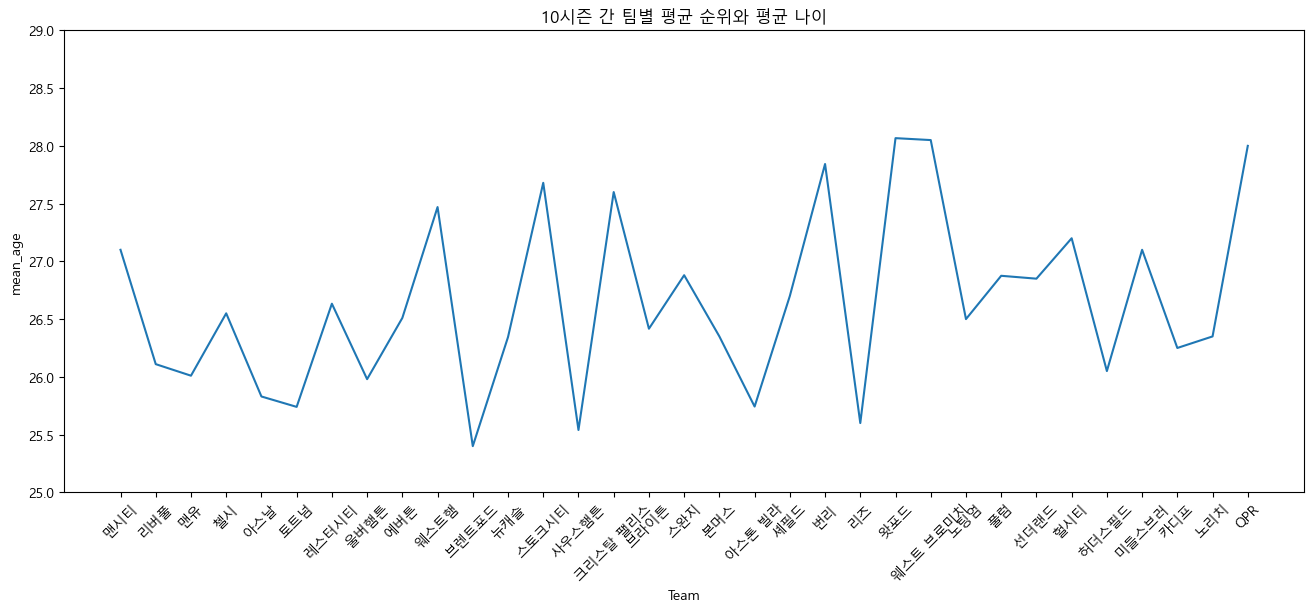

In [241]:
# 10시즌간 팀별 평균 순위와 평균 나이
team_age_rank= soccer_copy.groupby('Team').agg(mean_age = ('AverageAge', 'mean'),
                                                 mean_rank = ('Rank', 'mean'))
team_age_rank = team_age_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_age_rank, x = 'Team', y = 'mean_age')
plt.xticks(rotation = 45)
plt.ylim(25,29)
plt.title('10시즌 간 팀별 평균 순위와 평균 나이')
plt.show()

2.4659999999999997
190.25


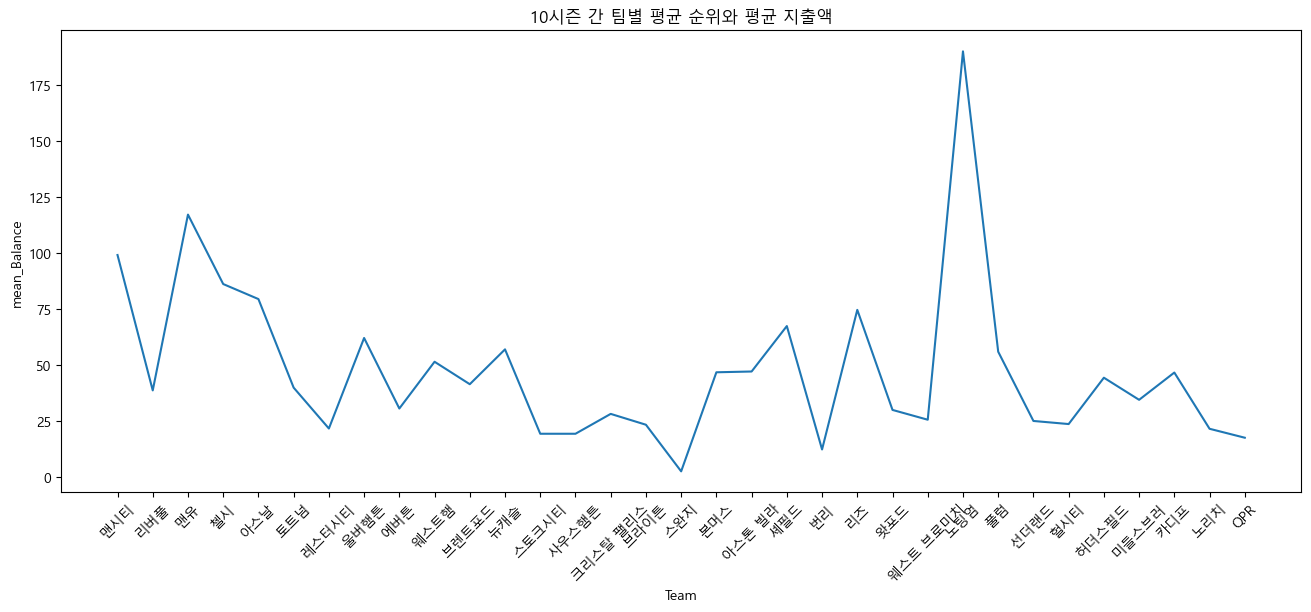

In [242]:
# 10시즌간 팀별 평균 순위와 평균 지출액
team_Balance_rank= soccer_copy.groupby('Team').agg(mean_Balance = ('Balance(m)', 'mean'),
                                                 mean_rank = ('Rank', 'mean'))
team_Balance_rank = team_Balance_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_Balance_rank, x = 'Team', y = 'mean_Balance')
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 평균 지출액')
plt.show()

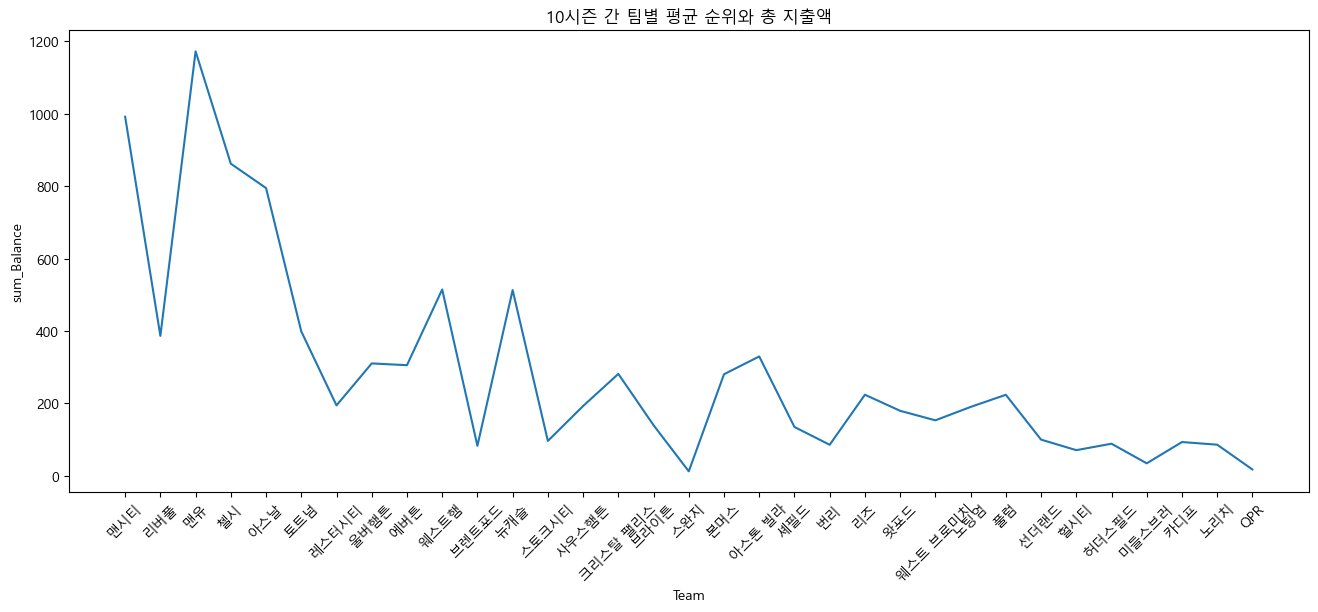

In [164]:
# 10시즌간 팀별 평균 순위와 총 지출액
team_Balance_rank= soccer_copy.groupby('Team').agg(sum_Balance = ('Balance(m)', 'sum'),
                                                 mean_rank = ('Rank', 'mean'))
team_Balance_rank = team_Balance_rank.sort_values('mean_rank', ascending=True)
plt.figure(figsize = (16,6))
sns.lineplot(data = team_Balance_rank, x = 'Team', y = 'sum_Balance')
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 순위와 총 지출액')
plt.show()

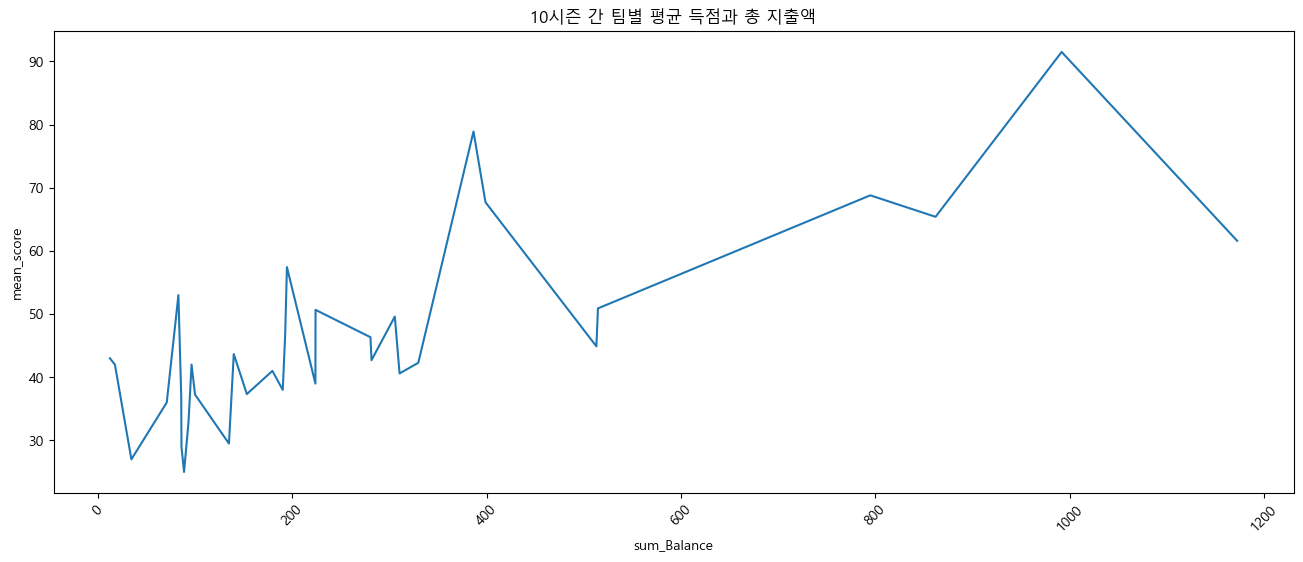

In [315]:
# 10시즌간 팀별 평균 순위와 총 지출액
team_Balance_rank= soccer_copy.groupby('Team').agg(sum_Balance = ('Balance(m)', 'sum'),
                                                 mean_score = ('Score', 'mean'))
plt.figure(figsize=(16,6))
sns.lineplot(data = team_Balance_rank, x = 'sum_Balance', y = 'mean_score')
plt.xticks(rotation = 45)
plt.title('10시즌 간 팀별 평균 득점과 총 지출액')
plt.show()

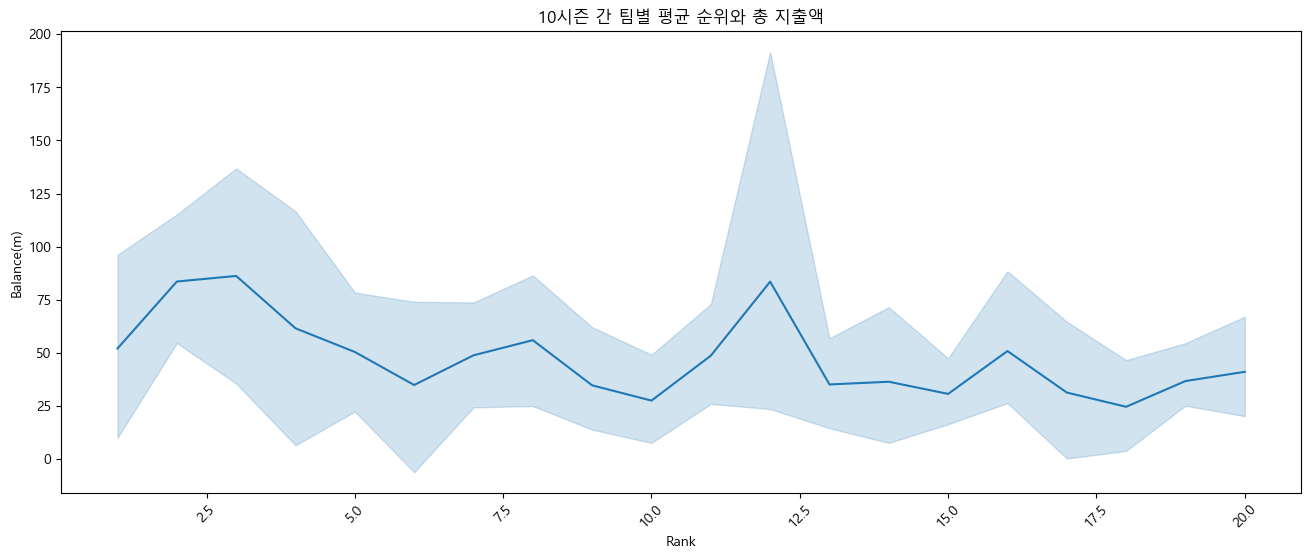

In [263]:
# 전체 데이터 순위와 지출액
plt.figure(figsize = (16,6))
sns.lineplot(data = soccer,x = 'Rank', y = 'Balance(m)')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 지출액')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

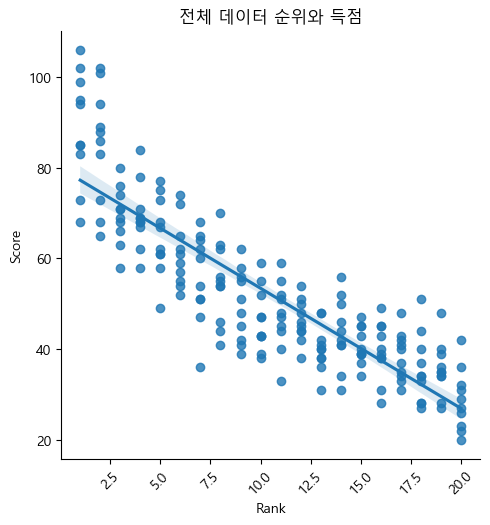

In [266]:
# 전체 데이터 순위와 득점
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'Score')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 득점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

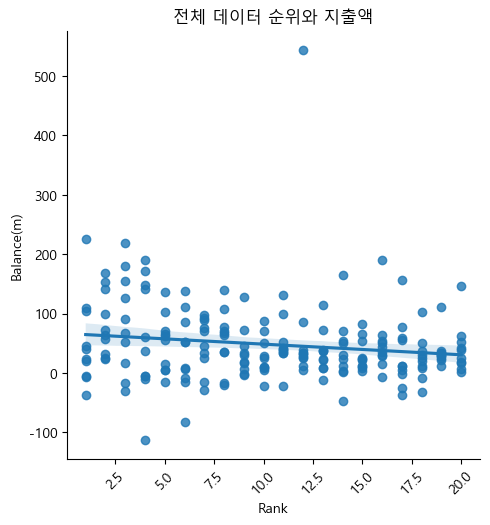

In [267]:
# 전체 데이터 순위와 지출액
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'Balance(m)')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 지출액')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

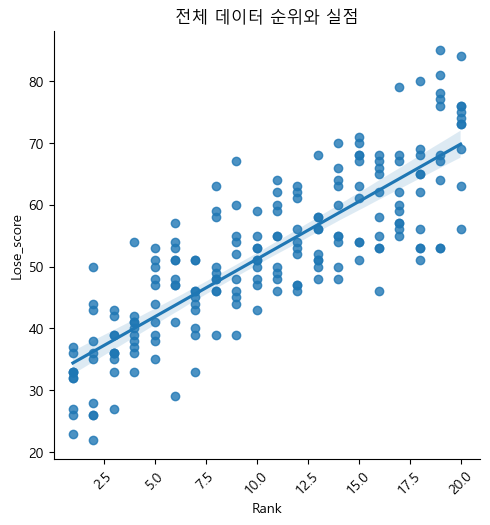

In [268]:
# 전체 데이터 순위와 실점
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'Lose_score')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 실점')
plt.show()

c:\Users\sangbeom\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

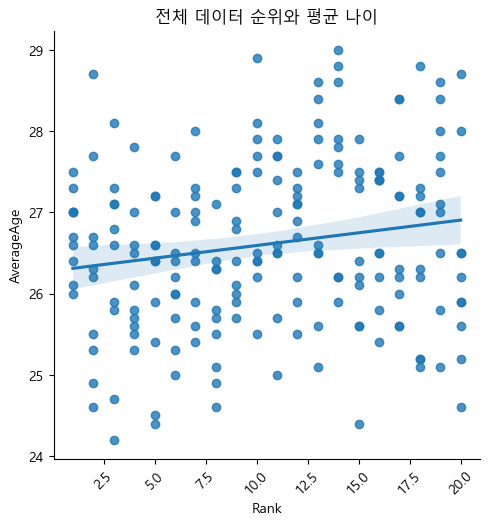

In [271]:
# 전체 데이터 순위와 평균 나이
plt.figure(figsize = (16,6))
sns.lmplot(data = soccer,x = 'Rank', y = 'AverageAge')
plt.xticks(rotation = 45)
plt.title('전체 데이터 순위와 평균 나이')
plt.show()

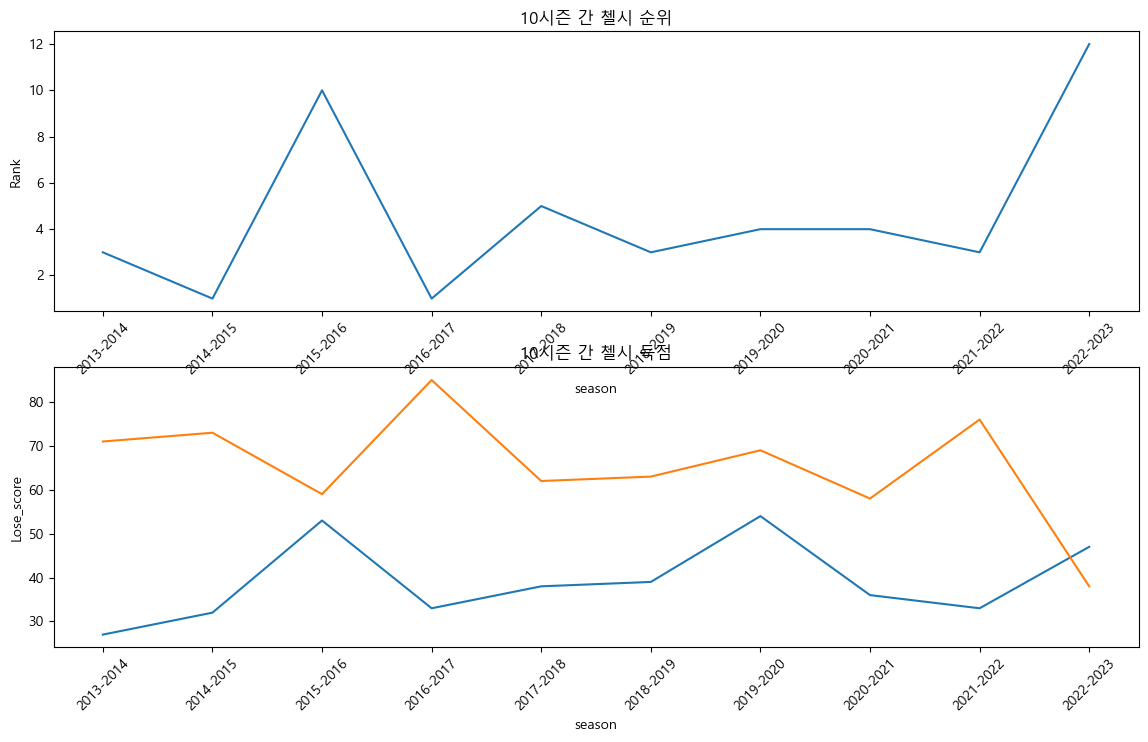

In [307]:
chl = soccer.loc[soccer.Team == '첼시']
plt.figure(figsize = (14,8))
plt.subplot(212)
sns.lineplot(data = chl, x = 'season', y = 'Lose_score')
plt.xticks(rotation = 45)
plt.title('10시즌 간 첼시 실점')
plt.subplot(211)
sns.lineplot(data = chl, x = 'season', y = 'Rank')
plt.xticks(rotation = 45)
plt.title('10시즌 간 첼시 순위')
plt.subplot(212)
sns.lineplot(data = chl, x = 'season', y = 'Score')
plt.xticks(rotation = 45)
plt.title('10시즌 간 첼시 득점')
plt.show()

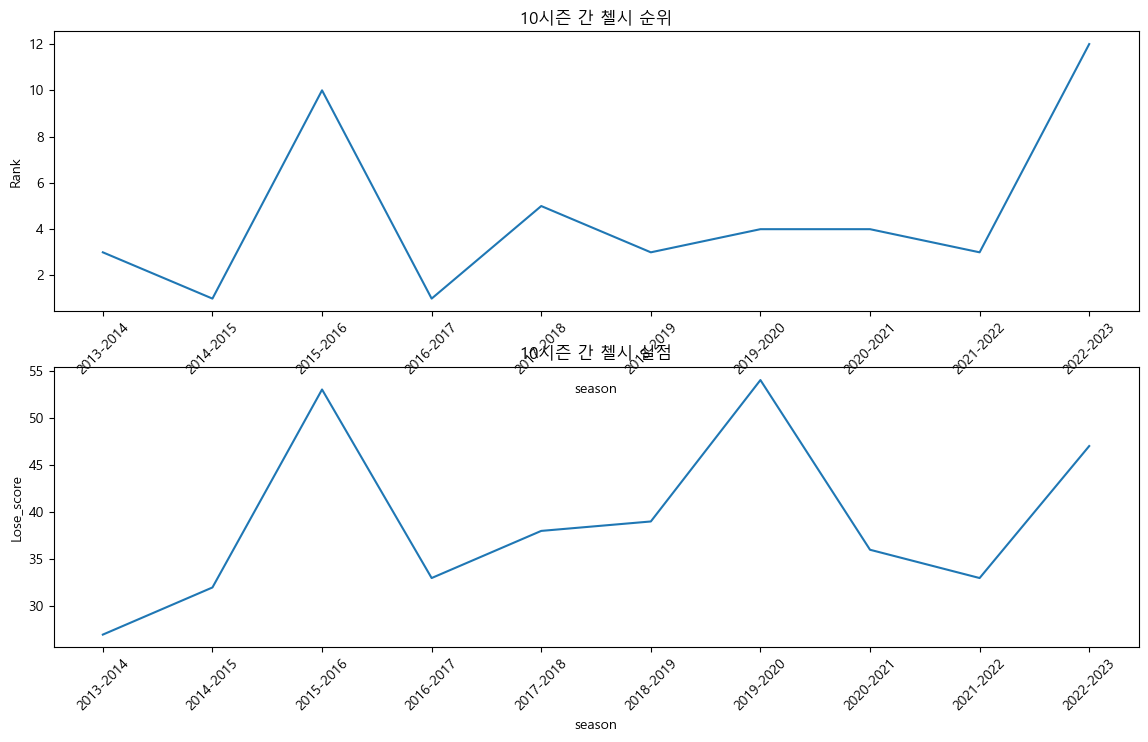

In [301]:
chl = soccer.loc[soccer.Team == '첼시']
plt.figure(figsize = (14,8))
plt.subplot(212)
sns.lineplot(data = chl, x = 'season', y = 'Lose_score')
plt.xticks(rotation = 45)
plt.title('10시즌 간 첼시 실점')
plt.subplot(211)
sns.lineplot(data = chl, x = 'season', y = 'Rank')
plt.xticks(rotation = 45)
plt.title('10시즌 간 첼시 순위')

plt.show()